In [1]:
"""
Chapter_1.13.3. Recursive feature elimination
参考
http://scikit-learn.org/stable/auto_examples/feature_selection/plot_rfe_digits.html#sphx-glr-auto-examples-feature-selection-plot-rfe-digits-py
"""
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

In [6]:
# Load the digits dataset
digits = load_digits()
X = digits.images.reshape((len(digits.images), -1))
y = digits.target

print(digits.keys())
print(digits.target_names)
print(digits.images.shape)
print(digits.data.shape)
print(y.shape)

dict_keys(['target', 'target_names', 'DESCR', 'data', 'images'])
[0 1 2 3 4 5 6 7 8 9]
(1797, 8, 8)
(1797, 64)
(1797,)


In [8]:
# Create the RFE object and rank each pixel
svc = SVC(kernel="linear", C=1)
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
ranking = rfe.ranking_.reshape(digits.images[0].shape)

print(ranking)

[[64 50 31 23 10 17 34 51]
 [57 37 30 43 14 32 44 52]
 [54 41 19 15 28  8 39 53]
 [55 45  9 18 20 38  1 59]
 [63 42 25 35 29 16  2 62]
 [61 40  5 11 13  6  4 58]
 [56 47 26 36 24  3 22 48]
 [60 49  7 27 33 21 12 46]]


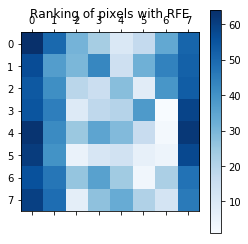

In [9]:
# Plot pixel ranking
plt.matshow(ranking, cmap=plt.cm.Blues)
plt.colorbar()
plt.title("Ranking of pixels with RFE")
plt.show()